In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [2]:
from ipywidgets import *
%matplotlib widget

## El Mapeo Logistico

In [3]:
def Logistico(r,x):
    return r*x*(1-x) 

In [4]:
P0 = 0.2001
r = 3.75
N = 500

In [5]:
P1 = Logistico(r,P0)
P1

0.6002249625

In [6]:
Pn = P0
for i in range(N):
    Pn = Logistico(r,Pn)
    # print(Pn)

print(Pn)
Pn = Logistico(r,Pn)
Pn

0.7330824038174358


0.7337722238650717

interactive(children=(FloatSlider(value=0.8, description='x0', max=1.0, step=0.01), FloatSlider(value=3.54, de…

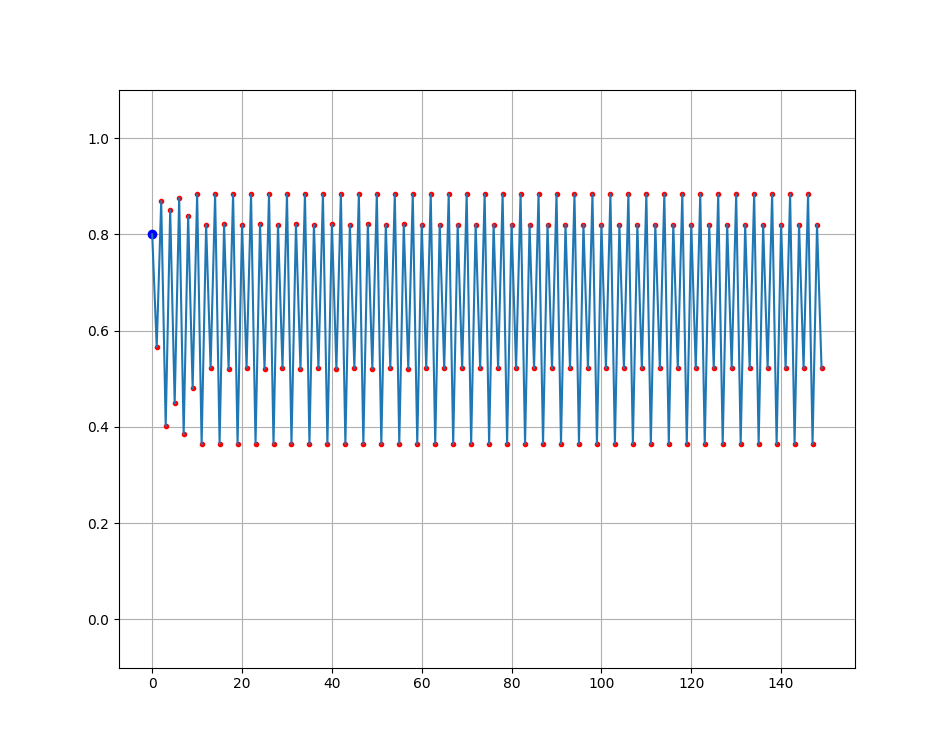

In [8]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_ylim([-0.1, 1.1])
ax.grid(True)

@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01),n=(50, 1000, 10))
def update(x0=0.8,r = 3.54,n = 150):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()


    X=[]
# Y=[]

    x = x0
    X.append(x)

    for i in range(1,n):

        x = Logistico(r,x)
        X.append(x)


    plt.plot(X,'r.')
    plt.plot(x0,'bo')
    plt.plot(X)
    #plot(Y) 

Ahora con dos condiciones iniciales diferentes!

interactive(children=(FloatSlider(value=0.33, description='x0', max=1.0, step=0.01), FloatSlider(value=0.9, de…

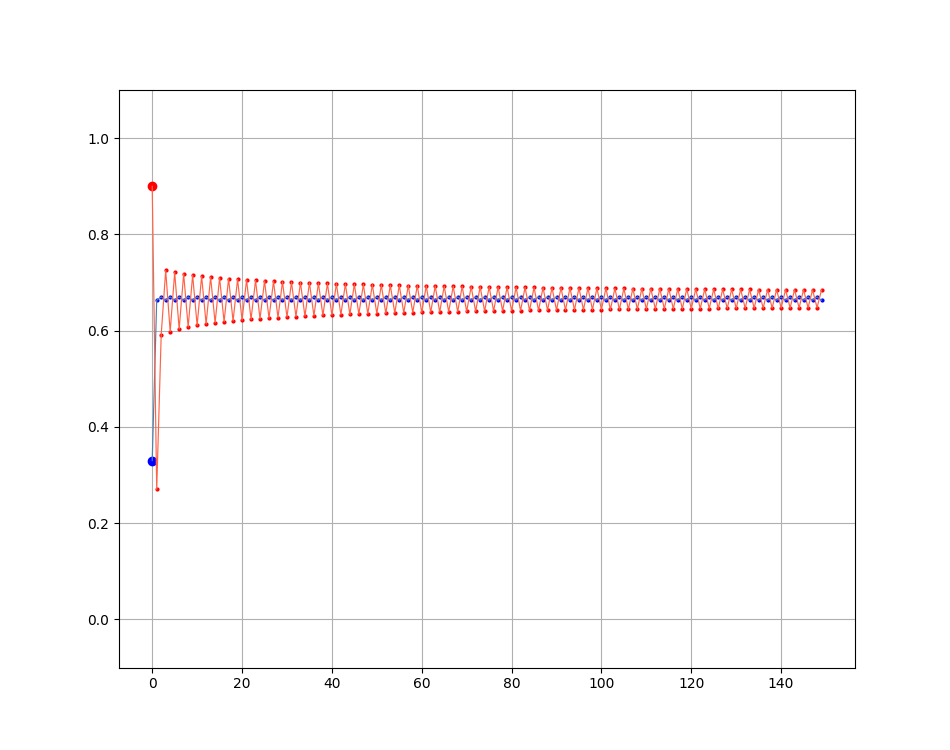

In [9]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_ylim([-0.1, 1.1])
ax.grid(True)

@widgets.interact(x0=(0, 1, 0.01),y0=(0, 1, 0.01),r=(0, 4, 0.01),n=(50, 1000, 10))


def update(x0=0.33,y0=0.9,r = 3., n = 150):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()
    ax.set_ylim([-0.1, 1.1])
    ax.grid(True)   
    
    
    X=[]
    Y=[]

    x = x0
    y = y0
    
    X.append(x)
    Y.append(y)

    for i in range(1,n):

        x = Logistico(r,x)
        X.append(x)
        
        y = Logistico(r,y)
        Y.append(y)        


    plt.plot(X,'bo', markersize=2)
    plt.plot(x0,'bo')
    plt.plot(X, color = 'steelblue', lw=0.85)
    
    plt.plot(Y,'ro', markersize=2)
    plt.plot(y0,'ro')
    plt.plot(Y, color = 'tomato', lw=0.85)   


Tecnica de iteración de Teleraña (Coweb)

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0, step=0.01), FloatSlider(value=3.0, des…

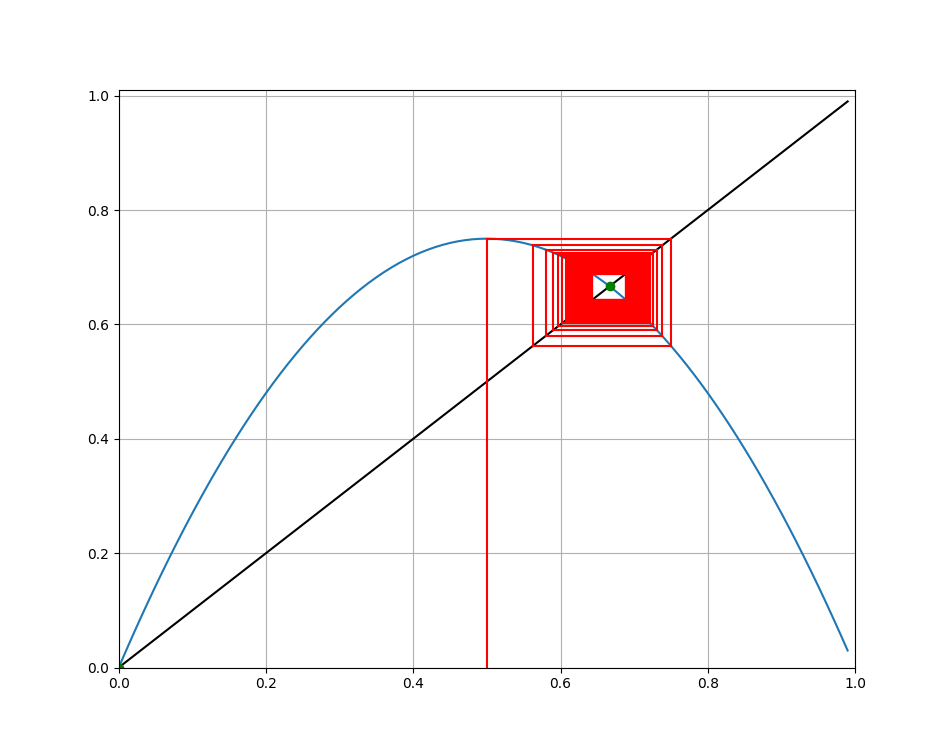

In [10]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.set_xlim([0, 1])
ax.set_ylim([0.0, 1.01])
ax.grid(True)


@widgets.interact(x0=(0, 1, 0.01),r=(0, 4, 0.01)) 
def update(x0=0.5,r = 3.):
    
    n = 100
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
  
    T=np.linspace(0,1,n,endpoint=False)
    
    plt.plot(T,T, color="black")
    plt.plot(T,r*T*(1-T) ) 
    
    plt.plot(0.,0.,'go')   
    
    eqx = float(r-1)/float(r)    
    plt.plot(eqx,Logistico(r,eqx),'go')    

    x = x0
        
    if x0 < eqx:
        
        xV = [0, x0]        
        yV = [x0, x0]       
        plt.plot(yV, xV, color='red')   
        
    else:

        xV = [x0,x0]    
        yV = [Logistico(r,x0), 0]        
        plt.plot(xV, yV, color='red')   
 
    
    
    for i in range(1,n):       
        
        if x == x0:            
            if x0 < eqx:
                Pi = [x, x]
            else:
                Pi = [0,0] 
        else:           
            Pi = [x, x]                

        a = x

        x = Logistico(r,x)
#         X.append(x)

        Pf = [a, x] 
        plt.plot(Pi, Pf, color='red')

        b = x

        xV = [a, b]
        yV = [b, b]
        plt.plot(xV, yV, color='red')

        xV = [b, b]
        yV = [b, b]
        plt.plot(xV, yV)   

## Gráfica de Feigenbaum (Caos determinista)

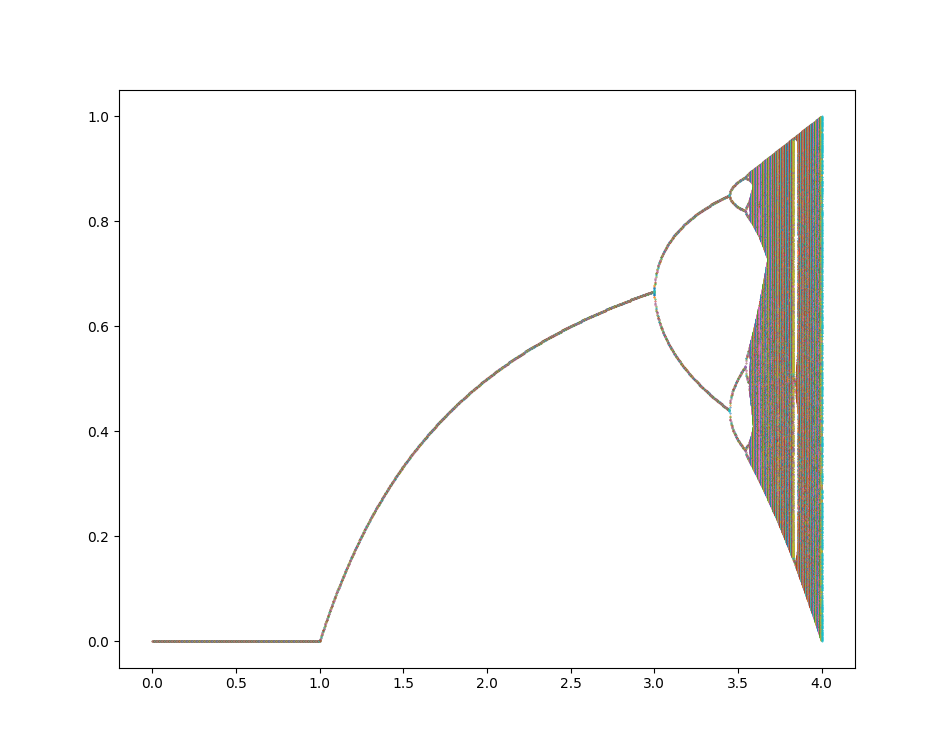

In [11]:
fig, ax = plt.subplots(figsize=(9.5, 7.5))

x0=0.5
n=1000
# itSbl=1000
itSbl=1000

# for r in np.arange(0, 3., 0.001):
# for r in np.arange(2.5, 4., 0.001):
for r in np.arange(0. , 4., 0.001):
    
    R=[]
    X=[]    
    
    R.append(r)
    xn=x0

    for i in range(0,n):
        xn=Logistico(r,xn)

#     X.append(xn)
    X.append(round(xn,3))    
    
    
    for i in range(1,itSbl):
        xn=Logistico(r,xn)
        
        if round(xn,3) not in X:          
#             X.append(xn)
            X.append(round(xn,3))
            R.append(r)       
        
    plt.plot(R,X,'.', markersize=.75)
#     plt.plot(R,X,'o', markersize=.5)    